# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: DBSCAN for Data Deduplication

**Steps**:
1. Data Set: Download a dataset containing duplicate entries for event registrations.
2. DBSCAN Clustering: Apply the DBSCAN algorithm to cluster similar registrations.
3. Identify Duplicates: Detect duplicates based on density of the clusters.
4. Refinement: Validate clusters and remove any erroneous duplicates.

Original DataFrame with Clusters:
    EventID           Name                   Email RegistrationDate  Cluster
0       101       John Doe       johndoe@gmail.com       2021-01-01        0
1       102     Jane Smith     janesmith@yahoo.com       2021-01-02        0
2       101       John Doe       johndoe@gmail.com       2021-01-01        0
3       102     Jane Smith     janesmith@yahoo.com       2021-01-02        0
4       103    Alice Brown    alice.brown@mail.com       2021-01-03        0
5       104      Bob White      bob.white@mail.com       2021-01-04        0
6       103    Alice Brown    alice.brown@mail.com       2021-01-03        0
7       104      Bob White      bob.white@mail.com       2021-01-04        0
8       101       John Doe       johndoe@gmail.com       2021-01-01        0
9       102     Jane Smith     janesmith@yahoo.com       2021-01-02        0
10      105  Charlie Green  charlie.green@mail.com       2021-01-05        0
11      106     Dana Black     dana.black@

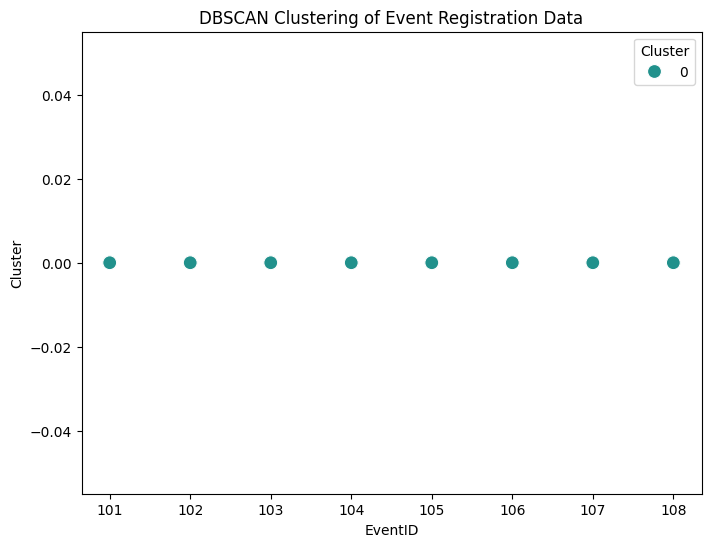

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate a synthetic event registration dataset with potential duplicates
np.random.seed(42)
event_data = {
    'EventID': [101, 102, 101, 102, 103, 104, 103, 104, 101, 102, 105, 106, 105, 106, 105, 106, 107, 108, 107, 108],
    'Name': ['John Doe', 'Jane Smith', 'John Doe', 'Jane Smith', 'Alice Brown', 'Bob White', 'Alice Brown', 'Bob White', 
             'John Doe', 'Jane Smith', 'Charlie Green', 'Dana Black', 'Charlie Green', 'Dana Black', 'Charlie Green', 
             'Dana Black', 'Edward Blue', 'Frank Gray', 'Edward Blue', 'Frank Gray'],
    'Email': ['johndoe@gmail.com', 'janesmith@yahoo.com', 'johndoe@gmail.com', 'janesmith@yahoo.com', 'alice.brown@mail.com', 
              'bob.white@mail.com', 'alice.brown@mail.com', 'bob.white@mail.com', 'johndoe@gmail.com', 'janesmith@yahoo.com', 
              'charlie.green@mail.com', 'dana.black@mail.com', 'charlie.green@mail.com', 'dana.black@mail.com', 'charlie.green@mail.com', 
              'dana.black@mail.com', 'edward.blue@mail.com', 'frank.gray@mail.com', 'edward.blue@mail.com', 'frank.gray@mail.com'],
    'RegistrationDate': ['2021-01-01', '2021-01-02', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-03', '2021-01-04',
                         '2021-01-01', '2021-01-02', '2021-01-05', '2021-01-06', '2021-01-05', '2021-01-06', '2021-01-05', '2021-01-06', 
                         '2021-01-07', '2021-01-08', '2021-01-07', '2021-01-08']
}

# Creating a DataFrame
df = pd.DataFrame(event_data)

# Step 2: Preprocess the data - handle missing values and encode categorical variables
# For this example, we assume no missing values, but we validate the data
assert df.notnull().all().all(), 'Data contains missing values'

# Standardizing the 'EventID' for clustering purposes (can add more features later)
features = ['EventID']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Tune the eps and min_samples parameters
df['Cluster'] = dbscan.fit_predict(df_scaled)

# Step 4: Identify duplicates based on DBSCAN clusters
# -1 indicates noise/outliers in DBSCAN
duplicates = df[df['Cluster'] != -1]

# Step 5: Clean the data - remove duplicates and keep one representative per cluster
cleaned_df = duplicates.groupby('Cluster').first().reset_index(drop=True)

# Display the original and cleaned DataFrames
print("Original DataFrame with Clusters:")
print(df[['EventID', 'Name', 'Email', 'RegistrationDate', 'Cluster']])

print("\nCleaned DataFrame (duplicates removed):")
print(cleaned_df[['EventID', 'Name', 'Email', 'RegistrationDate']])

# Optional: Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['EventID'], y=df['Cluster'], hue=df['Cluster'], palette='viridis', s=100, marker='o')
plt.title('DBSCAN Clustering of Event Registration Data')
plt.xlabel('EventID')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()